# Introduction

This is my approach to the ["Tell a Data Story" performance task](https://github.com/albemlee/PTPracticeData/blob/master/U2L15%20Practice%20PT%20Overview%20and%20Rubric%20-%20Tell%20a%20Data%20Story.pdf) from Code.org's Computer Science Principles Cirriculum. Given that I have additional data science tools and techniques at my disposal, my results are going to differ from yours. However, there should still be similarities in the overall approach to the task.

## Download the dataset

I downloaded the survey responses from [Google Drive](https://docs.google.com/spreadsheets/d/1ayMM9Rcr_wHoS4kcz9LpJ9ejIPvJIS4MUv_tIJNDPU4/edit?usp=sharing) as a csv file and named it ["data.csv"](https://github.com/albemlee/PTPracticeData/blob/master/data.csv) The code below loads it into my workspace and saves it into a dataframe called "data".

In [175]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

Let's take a look to see what our data looks like.

In [176]:
data

,Timestamp,How many hours did you sleep last night?,"How many hours did you work (e.g. do homework, or a job) after you left school?",How many hours did you spend relaxing after you left school?,What did you do to relax last night?,How do you feel today?,Which best describes you (your answer should be the same every day)
0,10/23/2017 8:04:21,6 1/2,3,0,0,Good,Youngest Siblling
1,10/23/2017 8:04:52,7,1,4,watch tv,Good,Oldest Sibling
2,10/23/2017 8:05:23,7,6,1,Sleep,Meh,Oldest Sibling
3,10/23/2017 8:05:30,6,7,0,Took a nap,Meh,Oldest Sibling
4,10/23/2017 8:05:36,6.5,2,4,Watch Netflix,Good,Youngest Siblling
5,10/23/2017 8:05:39,6,8,8,got on facetime,Great,Only Child
6,10/23/2017 8:05:41,6 hours,4-6 hours,"Maybe, 13",I stopped doing my homework.,Meh,Middle Sibling
7,10/23/2017 8:05:56,6,4,6,I took a shower and drunk hot chocolate .,Meh,Youngest Siblling
8,10/23/2017 8:06:18,7 hours,1 hour,2 hours,Watch movies on tv with my mother.,Meh,Only Child
9,10/23/2017 8:06:20,7 hours,8 hours,0 hours,go somewhere with my boyfriend,Good,Only Child


It looks like we have 110 rows and 7 columns.

## Clean the dataset

#### Rename Columns

I am not a fan of the column names, so I am first going to rename the columns. I prefer names that are short, and I am going to use a convention call [camelcase](https://en.wikipedia.org/wiki/Camel_case).

In [177]:
data.columns = ['TimeStamp', 'HoursSleep', 'HoursWork', 'HoursRelaxing', 'RelaxActivity', 'Feel', 'PersonalDescription']
data

,TimeStamp,HoursSleep,HoursWork,HoursRelaxing,RelaxActivity,Feel,PersonalDescription
0,10/23/2017 8:04:21,6 1/2,3,0,0,Good,Youngest Siblling
1,10/23/2017 8:04:52,7,1,4,watch tv,Good,Oldest Sibling
2,10/23/2017 8:05:23,7,6,1,Sleep,Meh,Oldest Sibling
3,10/23/2017 8:05:30,6,7,0,Took a nap,Meh,Oldest Sibling
4,10/23/2017 8:05:36,6.5,2,4,Watch Netflix,Good,Youngest Siblling
5,10/23/2017 8:05:39,6,8,8,got on facetime,Great,Only Child
6,10/23/2017 8:05:41,6 hours,4-6 hours,"Maybe, 13",I stopped doing my homework.,Meh,Middle Sibling
7,10/23/2017 8:05:56,6,4,6,I took a shower and drunk hot chocolate .,Meh,Youngest Siblling
8,10/23/2017 8:06:18,7 hours,1 hour,2 hours,Watch movies on tv with my mother.,Meh,Only Child
9,10/23/2017 8:06:20,7 hours,8 hours,0 hours,go somewhere with my boyfriend,Good,Only Child


Now that the columns are renamed, let's see if we can get each column to a standard format

#### Reformat Timestamp

Let's convert the data type in the "TimeStamp" column to [datetime](https://docs.python.org/3/library/datetime.html).

In [178]:
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

In [179]:
data['TimeStamp'].head()

0   2017-10-23 08:04:21
1   2017-10-23 08:04:52
2   2017-10-23 08:05:23
3   2017-10-23 08:05:30
4   2017-10-23 08:05:36
Name: TimeStamp, dtype: datetime64[ns]

#### Reformat HoursSleep

I want all the data in this column to be decimal numbers. Let's start by removing "hours" from each cell.

In [180]:
HourRep = [' hours', 'hours',' Hours', ' hrs', ' Hrs', ' HRS']
def remove_hours(data, column, HourRep):
    for hr in HourRep:
        data[column] = data[column].str.replace(hr, '')
    return(data)

In [181]:
data = remove_hours(data, 'HoursSleep', HourRep)
print(data['HoursSleep'])

0      6 1/2
1          7
2          7
3          6
4        6.5
5          6
6          6
7          6
8          7
9          7
10         6
11         5
12         6
13       Six
14         4
15         8
16         7
17         7
18         7
19         7
20         4
21      4:45
22         4
23         7
24         6
25       1.5
26       Six
27         1
28         x
29       6.5
       ...  
80         6
81         5
82         4
83         4
84         5
85         4
86         5
87         8
88         7
89         8
90         6
91         1
92         6
93       5.5
94         5
95         6
96         5
97         5
98         6
99         7
100        5
101        7
102        7
103        7
104        7
105      6.5
106        7
107     Four
108        7
109        6
Name: HoursSleep, dtype: object


Next, let's convert written out versions of the hours to the number

In [182]:
str_to_int = {'zero': 0,
              'one': 1,
              'two': 2,
              'three': 3,
              'four': 4,
              'five': 5,
              'six': 6,
              'seven': 7,
              'eight': 8,
              'nine': 9,
              'ten': 10,
              'Zero': 0,
              'One': 1,
              'Two':2,
              'Three': 3,
              'Four': 4,
              'Five': 5,
              'Six': 6,
              'Seven': 7,
              'Eight': 8,
              'Nine': 9,
              'Ten': 10,
             }

In [183]:
def convert_str_to_digit(data, column, str_to_int):
    for i, row in data.iterrows():
        for number, digit in str_to_int.items():
            if number in str(data.loc[i, column]):
                data.loc[i, column] = data.loc[i, column].replace(number, str(digit))
    return(data)

In [184]:
data = convert_str_to_digit(data, 'HoursSleep', str_to_int)
print(data['HoursSleep'])

0      6 1/2
1          7
2          7
3          6
4        6.5
5          6
6          6
7          6
8          7
9          7
10         6
11         5
12         6
13         6
14         4
15         8
16         7
17         7
18         7
19         7
20         4
21      4:45
22         4
23         7
24         6
25       1.5
26         6
27         1
28         x
29       6.5
       ...  
80         6
81         5
82         4
83         4
84         5
85         4
86         5
87         8
88         7
89         8
90         6
91         1
92         6
93       5.5
94         5
95         6
96         5
97         5
98         6
99         7
100        5
101        7
102        7
103        7
104        7
105      6.5
106        7
107        4
108        7
109        6
Name: HoursSleep, dtype: object


It looks like most of the rows are starting to look standardized, but there are still a few outliers such as "1/2" and ":45." Let's address those too.

In [185]:
bad_list = {' 1/2':'.5',
            ':45':'.75',
            'None':'0',
           }

In [186]:
def remove_bad_stuff(data, column, bad_list):
    for i, row in data.iterrows():
        for bad, good in bad_list.items():
            if bad in str(data.loc[i, column]):
                data.loc[i, column] = data.loc[i, column].replace(bad, good)
    return(data)

In [187]:
data = remove_bad_stuff(data, 'HoursSleep', bad_list)
print(data['HoursSleep'])

0       6.5
1         7
2         7
3         6
4       6.5
5         6
6         6
7         6
8         7
9         7
10        6
11        5
12        6
13        6
14        4
15        8
16        7
17        7
18        7
19        7
20        4
21     4.75
22        4
23        7
24        6
25      1.5
26        6
27        1
28        x
29      6.5
       ... 
80        6
81        5
82        4
83        4
84        5
85        4
86        5
87        8
88        7
89        8
90        6
91        1
92        6
93      5.5
94        5
95        6
96        5
97        5
98        6
99        7
100       5
101       7
102       7
103       7
104       7
105     6.5
106       7
107       4
108       7
109       6
Name: HoursSleep, dtype: object


There are a few columns that don't seem to be numbers (like 'x'). Let's remove those columns from our data,

In [188]:
def remove_nonnumbers(data, column):
    for i, row in data.iterrows():
        try:
            data.loc[i, column] = pd.to_numeric(data.loc[i, column])
        except:
            data = data.drop(i)
    data[column] = pd.to_numeric(data[column])
    return(data)

In [189]:
data = remove_nonnumbers(data, 'HoursSleep')
print(data['HoursSleep'])

0      6.50
1      7.00
2      7.00
3      6.00
4      6.50
5      6.00
6      6.00
7      6.00
8      7.00
9      7.00
10     6.00
11     5.00
12     6.00
13     6.00
14     4.00
15     8.00
16     7.00
17     7.00
18     7.00
19     7.00
20     4.00
21     4.75
22     4.00
23     7.00
24     6.00
25     1.50
26     6.00
27     1.00
29     6.50
30     6.00
       ... 
80     6.00
81     5.00
82     4.00
83     4.00
84     5.00
85     4.00
86     5.00
87     8.00
88     7.00
89     8.00
90     6.00
91     1.00
92     6.00
93     5.50
94     5.00
95     6.00
96     5.00
97     5.00
98     6.00
99     7.00
100    5.00
101    7.00
102    7.00
103    7.00
104    7.00
105    6.50
106    7.00
107    4.00
108    7.00
109    6.00
Name: HoursSleep, dtype: float64


Just to summarize, the steps I took to clean the HoursSleep column are:
1. remove "hours" (i.e. "6 hours" -> 6)
2. convert string values to numbers (i.e. "six" -> 6)
3. convert any additional outlier formats to numbers (i.e. "6 1/2" -> 6.5)
4. remove columns that are not numbers (i.e. "x" is removed)

#### Reformat HoursWork

It looks like HoursWork should be in the same format as HoursSleep. Let's apply the same heuristics we used for HoursSleep to HoursWork.

In [190]:
def clean_hours_columns(data, column, HourRep, str_to_int, bad_list):
    data = remove_hours(data, column, HourRep)
    data = convert_str_to_digit(data, column, str_to_int)
    data = remove_bad_stuff(data, column, bad_list)
    data = remove_nonnumbers(data, column)
    return(data)

In [191]:
data = clean_hours_columns(data, 'HoursWork', HourRep, str_to_int, bad_list)
print(data['HoursWork'])

0       3
1       1
2       6
3       7
4       2
5       8
7       4
9       8
10      2
11      4
12      7
13      3
14      9
15      3
18      2
19      2
20      6
22      9
23      1
24      2
25     32
26      3
27      1
29      3
31      1
33      1
34      1
35      1
36      6
37      3
       ..
80      7
81      9
82      8
83      0
84      5
85      6
86      3
87      3
88      0
89      2
90      0
91      6
92      2
93      5
94      1
95      6
96      5
97      0
98      1
99      3
100     1
101     1
102     3
103     4
104     5
105     6
106     2
107     3
108     6
109     3
Name: HoursWork, dtype: int64


#### Reformat HoursRelaxing

Seems like the same deal with HoursRelaxing. Let's do the same thing.

In [192]:
data = clean_hours_columns(data, 'HoursRelaxing', HourRep, str_to_int, bad_list)
print(data['HoursRelaxing'])

0       0.0
1       4.0
2       1.0
3       0.0
4       4.0
5       8.0
7       6.0
9       0.0
10      3.0
11      3.0
12      1.0
13      4.0
14      2.0
15      2.0
18      3.0
20      2.0
22      5.0
23     23.0
24      2.0
25      4.0
26      4.0
27      1.0
29      0.0
31      1.0
33      1.0
34      1.0
35      1.0
36      2.0
41      5.0
42      1.0
       ... 
80     13.0
81      0.0
82      0.0
83      0.0
84      0.0
85      2.5
86      1.0
87      2.0
88      2.0
89      8.0
90      5.0
91      2.0
92      2.0
93      2.0
94      1.0
95      0.0
96      1.0
97      9.0
98      4.0
99      2.0
100     6.5
101     5.0
102     2.0
103     3.0
104     3.0
105     2.0
106     5.0
107     4.0
108     0.0
109     4.0
Name: HoursRelaxing, dtype: float64


#### Reformat RelaxActivity

The data is already all in text format. I am going to make the assumption that legitimate responses are at least 3 characters long and delete responses that are less than 4 characters long.

In [193]:
def remove_short_responses(data, column, cutoff):
    for i, row in data.iterrows():
        if len(str(data.loc[i, column])) <= cutoff:
            data.loc[i, column] = ""
    return(data)

In [194]:
data = remove_short_responses(data, 'RelaxActivity', 3)
print(data['RelaxActivity'])

0                                                       
1                                               watch tv
2                                                  Sleep
3                                             Took a nap
4                                          Watch Netflix
5                                        got on facetime
7             I took a shower and drunk hot chocolate . 
9                         go somewhere with my boyfriend
10                                         Watch Youtube
11                              Watched Hulu and Netflix
12                                              watch tv
13                  I ate some food and watched a movie.
14     play video games, watch tv, listen to music, s...
15                                    read/watch youtube
18                              watch tv and laying down
20                                        Was on Netflix
22                                                 Slept
23                             

A few responses are "nothing." I will go ahead and delete those too.

In [195]:
nothing = ['Nothing', 'nothing']
def remove_nothing(data, column, nothing):
    for i, row in data.iterrows():
        for word in nothing:
            if word in str(data.loc[i, column]):
                data.loc[i, column] = ""
    return(data)

In [196]:
data = remove_nothing(data, 'RelaxActivity', nothing)
print(data['RelaxActivity'])

0                                                       
1                                               watch tv
2                                                  Sleep
3                                             Took a nap
4                                          Watch Netflix
5                                        got on facetime
7             I took a shower and drunk hot chocolate . 
9                         go somewhere with my boyfriend
10                                         Watch Youtube
11                              Watched Hulu and Netflix
12                                              watch tv
13                  I ate some food and watched a movie.
14     play video games, watch tv, listen to music, s...
15                                    read/watch youtube
18                              watch tv and laying down
20                                        Was on Netflix
22                                                 Slept
23                             

Scanning through the responses, it seems like the activities fell into a few big categories:
1. Watching videos
2. Resting
3. Food and Drink
4. Socialize
5. Other

Let's create binary columns (1:yes, 0:no) for each of those categories based on keywords in the responses. This is called [one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f).

In [197]:
KeywordGroup1 = ['watch', 'Watch', 'tv', 'television', 'netflix', 'Netflix', 'TV', 'Youtube', 'YouTube', 'youtube', 'Binge']
KeywordGroup2 = ['sleep', 'Sleep', 'laid', 'laying', 'down', 'Napped', 'Nap', 'nap', 'slept', 'Slept', 'bed']
KeywordGroup3 = ['food', 'Food', 'eat', 'Eat', 'Drink', 'drink', 'ate', 'drank']
KeywordGroup4 = ['talked', 'Talked', 'facetime', 'Texted', 'texted', 'Facetime', 'phone', 'friends', 'boyfriend', 'girlfriend']

def identify_categories(data, column, KeywordGroup1, KeywordGroup2, KeywordGroup3, KeywordGroup4):
    data['WatchVideo'] = 0
    data['Rest'] = 0
    data['EatDrink'] = 0
    data['Socialize'] = 0
    data['Other'] = 0
    data['NoResponse'] = 0
    for i, row in data.iterrows():
        for keyword in KeywordGroup1:
            if keyword in str(data.loc[i, column]):
                data.loc[i, 'WatchVideo'] = 1
        for keyword in KeywordGroup2:
            if keyword in str(data.loc[i, column]):
                data.loc[i, 'Rest'] = 1
        for keyword in KeywordGroup3:
            if keyword in str(data.loc[i, column]):
                data.loc[i, 'EatDrink'] = 1
        for keyword in KeywordGroup4:
            if keyword in str(data.loc[i, column]):
                data.loc[i, 'Socialize'] = 1
        if data.loc[i, column] == '':
            data.loc[i, 'NoResponse'] = 1
        if data.loc[i, 'WatchVideo'] + data.loc[i, 'Rest'] + data.loc[i, 'EatDrink'] + data.loc[i, 'Socialize'] + data.loc[i, 'NoResponse'] == 0:
            data.loc[i, 'Other'] = 1
    return(data)

In [198]:
data = identify_categories(data, 'RelaxActivity', KeywordGroup1, KeywordGroup2, KeywordGroup3, KeywordGroup4)
print(data[['WatchVideo', 'Rest', 'EatDrink', 'Socialize', 'Other', 'NoResponse']][data['Other'] == 1])
# print(data['RelaxActivity'][data['Other'] == 1])

    WatchVideo  Rest  EatDrink  Socialize  Other  NoResponse
45           0     0         0          0      1           0
55           0     0         0          0      1           0
56           0     0         0          0      1           0
57           0     0         0          0      1           0
65           0     0         0          0      1           0
80           0     0         0          0      1           0


#### Reformat Feel

The responses in this column are already in a standard format. However, it seems that the information in this column is rankable, so I will convert this column from string to integer (2: Great, -2: Terrible)

In [199]:
ranks = {'Terrible': -2,
         'Bad': -1,
         'Meh': 0,
         'Good': 1,
         'Great': 2,
        }

def create_ranks(data, column, ranks):
    data[column].replace(ranks, inplace=True)
    return(data)

In [200]:
data = create_ranks(data, 'Feel', ranks)
print(data['Feel'])

0      1
1      1
2      0
3      0
4      1
5      2
7      0
9      1
10     1
11     0
12    -2
13     0
14    -1
15     0
18     1
20     0
22    -2
23     1
24     0
25    -2
26     0
27     0
29     1
31     0
33     0
34     1
35     2
36     0
41     1
42    -2
      ..
80     0
81    -2
82    -2
83    -1
84     2
85    -1
86     0
87     0
88     1
89     0
90     1
91     0
92     0
93     1
94    -1
95     0
96    -2
97     0
98     0
99     1
100    0
101    1
102    0
103    1
104    0
105    0
106    1
107    0
108    0
109    1
Name: Feel, dtype: int64


#### Reformat PersonalDescription

Like the responses in the Feel column, the responses in this column are already in a standardized format. Unlike Feel, PersonalDescription isn't rankable, so I won't convert this to integers. I will remove no responses from the dataset.

In [201]:
def remove_nonresponse(data, column):
    for i, row in data.iterrows():
        if data[column].empty:
            data = data.drop(i)
    data.dropna(inplace = True)
    return(data)

In [202]:
data = remove_nonresponse(data, 'PersonalDescription')
print(data['PersonalDescription'])

0      Youngest Siblling
1         Oldest Sibling
2         Oldest Sibling
3         Oldest Sibling
4      Youngest Siblling
5             Only Child
7      Youngest Siblling
9             Only Child
10     Youngest Siblling
11     Youngest Siblling
12     Youngest Siblling
13        Middle Sibling
14        Oldest Sibling
15        Middle Sibling
18        Middle Sibling
20        Oldest Sibling
22        Oldest Sibling
23            Only Child
24        Middle Sibling
25     Youngest Siblling
26        Middle Sibling
27        Middle Sibling
29     Youngest Siblling
33            Only Child
34     Youngest Siblling
35            Only Child
36        Oldest Sibling
41        Oldest Sibling
42     Youngest Siblling
43        Oldest Sibling
             ...        
80        Middle Sibling
81     Youngest Siblling
82        Oldest Sibling
83            Only Child
84        Middle Sibling
85        Middle Sibling
86     Youngest Siblling
87        Middle Sibling
88        Middle Sibling


#### Save Clean Data

Now that I have completed cleaning the data in each column, I will save it in a csv file called [clean_data.csv](https://github.com/albemlee/PTPracticeData/blob/master/clean_data.csv).

In [220]:
data.to_csv('clean_data.csv')

## Exploring the dataset

To explore the dataset, I will use [descriptive models](http://whatis.techtarget.com/definition/descriptive-modeling) on each column.

#### Explore TimeStamp

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

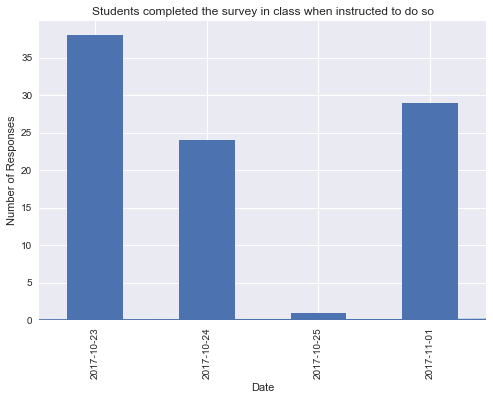

In [222]:
data['TimeStamp'].groupby(data["TimeStamp"].dt.date).count().plot(kind="bar")
plt.title('Students completed the survey in class when instructed to do so')
plt.xlabel('Date')
plt.ylabel('Number of Responses')
plt.show()

We did not get responses consistently on a daily basis, and the responses were within the duration of about a week. Perhaps a better way to collect the responses would have been to assign the survey as a homework assignment rather than setting aside time to do it in class.

10/25 had a only a few responses. My guess is that a few people filled out the survey on 10/25 in an attempt to access the responses.

#### Explore HoursSleep, HoursWork, and HoursRelaxing

HoursSleep, HoursWork, and HoursRelaxing were all decimal numbers. Let's see the distribution of responses for those three columns.

/Users/AlbertLee/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


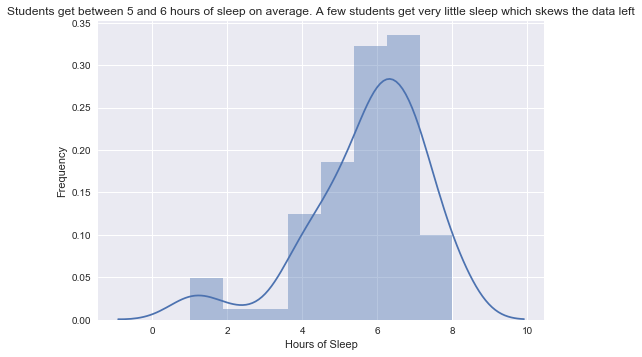

count    92.000000
mean      5.766304
std       1.574960
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       8.000000
Name: HoursSleep, dtype: float64

In [227]:
# HoursSleep
sns.distplot(data['HoursSleep'])
plt.title('Students get between 5 and 6 hours of sleep on average. A few students get very little sleep which skews the data left.')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.show()
data['HoursSleep'].describe()

The distribution was skewed left by students who didn't receive  much sleep. Hopefully this is due to students exaggerating on the survey, but if it isn't, it might be interesting to see what other factors correlates with low sleep.

/Users/AlbertLee/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


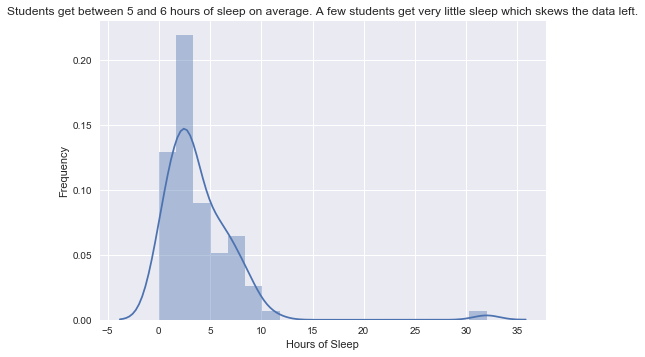

count    92.000000
mean      3.956522
std       3.924880
min       0.000000
25%       2.000000
50%       3.000000
75%       6.000000
max      32.000000
Name: HoursWork, dtype: float64

In [228]:
# HoursWork
sns.distplot(data['HoursWork'])
plt.title('Students spend about 3 hours working after school on average. A single response for 32 hours skewed the data right.')
plt.xlabel('Hours of Work')
plt.ylabel('Frequency')
plt.show()
data['HoursWork'].describe()

Another factor which may have skewed the data right is the interpretation of the question. Some students may havae interpretted the qustion as hours spend working in a week instead of hours spent working in a day. A better way to word this question could be "How many hours did you work YESTERDAY after you left school?" Given this ambiguity, I am not going to use the HoursWork column for any predictive models.

/Users/AlbertLee/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


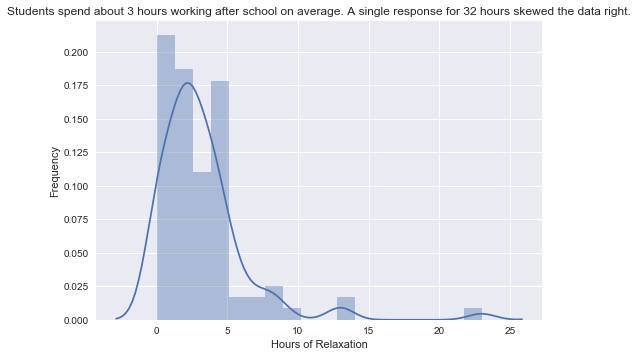

count    92.000000
mean      3.184783
std       3.293948
min       0.000000
25%       1.000000
50%       2.250000
75%       4.000000
max      23.000000
Name: HoursRelaxing, dtype: float64

In [229]:
#HoursRelaxing
sns.distplot(data['HoursRelaxing'])
plt.title('Students spend about 3 hours working after school on average. A single response for over 20 hours skewed the data right.')
plt.xlabel('Hours of Relaxation')
plt.ylabel('Frequency')
plt.show()
data['HoursRelaxing'].describe()

The data in this column is plagued by the same problem as HoursWork. A better way to word this question could be "How many hours did you relax YESTERDAY after you left school?" Given this ambiguity, I am not going to use the HoursWork column for any predictive models.

#### Explore RelaxActivity

I will first do text analysis on the RelaxActivity Column to identify the keywords. Next I will explore the one hot encoded columns.